In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import math

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from scipy import stats
from scipy.stats import kurtosis, skew

%matplotlib inline

In [2]:
path = r"D:\Machine Learning Content\Video Tutorials\Linear Regression\DataSets\oil_exxon.xlsx"
price_data = pd.read_excel(path)

price_data.head()

,date,exon_price,oil_price
0,2014-03-28,97.699997,106.64
1,2014-03-31,97.680000,105.95
2,2014-04-01,97.730003,105.70
3,2014-04-02,97.949997,103.37
4,2014-04-03,97.930000,104.88


In [3]:
#this will set my index to the data column
price_data.index = pd.to_datetime(price_data['date'])

#then drop the previous data column by specifying the column position(axis)
price_data = price_data.drop(['date'], axis = 1)

price_data.head()

,exon_price,oil_price
date,,
2014-03-28,97.699997,106.64
2014-03-31,97.680000,105.95
2014-04-01,97.730003,105.70
2014-04-02,97.949997,103.37
2014-04-03,97.930000,104.88


In [4]:
price_data.dtypes

exon_price    float64
oil_price     float64
dtype: object

In [5]:
#define the new name
new_column_name = {'exon_price':'exxon_price'}

#rename the column
price_data = price_data.rename(columns = new_column_name)
price_data.head()

,exxon_price,oil_price
date,,
2014-03-28,97.699997,106.64
2014-03-31,97.680000,105.95
2014-04-01,97.730003,105.70
2014-04-02,97.949997,103.37
2014-04-03,97.930000,104.88


In [6]:
#check for missing values
display(price_data.isna().any())

#drop any missing values
price_data = price_data.dropna()

#let's check to make sure the missing have been removed
display(price_data.isna().any())

exxon_price    False
oil_price       True
dtype: bool

exxon_price    False
oil_price      False
dtype: bool

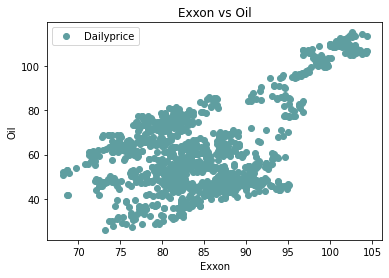

In [7]:
#lets define the x and y axis
x = price_data['exxon_price']
y = price_data['oil_price']

#create the scatter plot
plt.plot(x,y, 'o', color='cadetblue', label='Dailyprice')

#make sure its formatted
plt.title('Exxon vs Oil')
plt.xlabel('Exxon')
plt.ylabel('Oil')
plt.legend()
plt.show()

In [8]:
#measure the correlation
price_data.corr()

,exxon_price,oil_price
exxon_price,1.00000,0.60132
oil_price,0.60132,1.00000


In [9]:
#lets look the stats summary
price_data.describe()

,exxon_price,oil_price
count,1248.000000,1248.000000
mean,84.802796,61.935000
std,7.424687,19.288424
min,68.120003,26.010000
25%,80.190002,48.162500
50%,83.024998,57.120000
75%,88.529999,70.725000
max,104.379997,115.190000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015F1BF08460>,
      dtype=object)

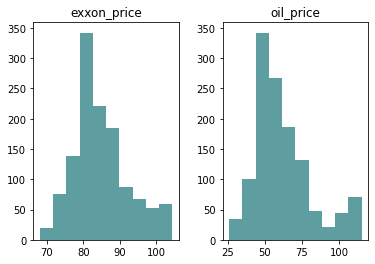

In [10]:
price_data.hist(grid=False, color='cadetblue')

In [11]:
#calculate the kurtosis using the fisher method
exxon_kurtosis = kurtosis(price_data['exxon_price'], fisher=True)
oil_kurtosis = kurtosis(price_data['oil_price'], fisher=True)

#calculate skewness
exxon_skew = skew(price_data['exxon_price'])
oil_skew = skew(price_data['oil_price'])

display("exxon kurtosis: {:.2}".format(exxon_kurtosis))
display("oil kurtosis:{:.2}".format(oil_kurtosis))

display("exxon skew: {:.2}".format(exxon_skew))
display("oil skew:{:.2}".format(oil_skew))


'exxon kurtosis: 0.088'

'oil kurtosis:0.53'

'exxon skew: 0.66'

'oil skew:1.0'

In [12]:
#perform a kurtosis test
display('Exxon')
display(stats.kurtosistest(price_data['exxon_price']))
display('Oil')
display(stats.kurtosistest(price_data['oil_price']))

#perform a skew test
display('Exxon')
display(stats.skewtest(price_data['exxon_price']))
display('Oil')
display(stats.skewtest(price_data['oil_price']))

'Exxon'

KurtosistestResult(statistic=0.7185349375030217, pvalue=0.47242751383320714)

'Oil'

KurtosistestResult(statistic=3.193868719980946, pvalue=0.0014037993965471192)

'Exxon'

SkewtestResult(statistic=8.770169400598549, pvalue=1.7839768456341654e-18)

'Oil'

SkewtestResult(statistic=12.471137868018896, pvalue=1.0728306198159925e-35)

In [13]:
#Define the input variable and the output variable
Y = price_data.drop('oil_price', axis=1)
X = price_data[['oil_price']]

#Split X and Y into x_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state=1)

In [14]:
#Create a linear regression model object
regression_model = LinearRegression()

#Pass the X_train and the Y_train data
regression_model.fit(X_train, y_train)

LinearRegression()

In [15]:
#Let's grap the coefficient of the model and the intercept
intercept = regression_model.intercept_[0]
coefficent = regression_model.coef_[0][0]

print("The coefficent of this model is {:.2}".format(coefficent))
print("The intercept of this model is {:.4}".format(intercept))

The coefficent of this model is 0.23
The intercept of this model is 70.55


In [16]:
#Let's test a prediction
prediction = regression_model.predict([[67.33]])
predicted_value = prediction[0][0]
print("The predicted value is {:.4}".format(predicted_value))

The predicted value is 86.0


In [17]:
#Get multiple prediction
y_predict = regression_model.predict(X_test)

#show the first 5 prediction
y_predict[:5]

array([[82.39718427],
       [83.0168246 ],
       [81.66738567],
       [79.18882438],
       [84.12070236]])

In [18]:
#Define the input
X2 = sm.add_constant(X)

#Create an OLS model
model = sm.OLS(Y, X2)

#Fit the model
est = model.fit()

In [19]:
#Confidence interval, 95% by default
est.conf_int()

,0,1
const,69.358126,71.57579
oil_price,0.214372,0.24856


In [20]:
#Calculate the Mean Absolute Error
model_mae = mean_absolute_error(y_test, y_predict)
#Calculate the Mean Squared Error
model_mse = mean_squared_error(y_test, y_predict)
#Calculate the Root Mean Squared Error
model_rmse = math.sqrt(model_mse)
#Display the output
print("MAE {:3}".format(model_mae))
print("MSE {:3}".format(model_mse))
print("RMSE {:3}".format(model_rmse))

MAE 5.049534807416864
MSE 38.753816586745984
RMSE 6.225256347070856


In [21]:
#R-squared
model_r2 = r2_score(y_test, y_predict)
print("R2 {:.2}".format(model_r2))

R2 0.36


In [22]:
#print out summary
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:            exxon_price   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     705.7
Date:                Wed, 23 Sep 2020   Prob (F-statistic):          1.42e-123
Time:                        12:27:00   Log-Likelihood:                -3992.3
No. Observations:                1248   AIC:                             7989.
Df Residuals:                    1246   BIC:                             7999.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         70.4670      0.565    124.678      0.0

<function matplotlib.pyplot.show(*args, **kw)>

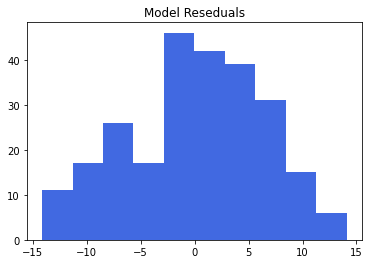

In [23]:
#Grab the residual and plot a hist
(y_test - y_predict).hist(grid=False, color='royalblue')
plt.title("Model Reseduals")
plt.show

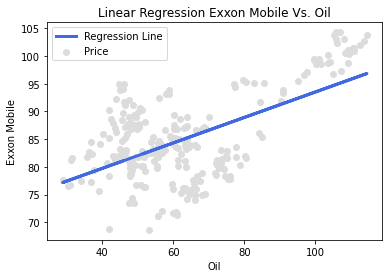

Oil coefficient:0.23
Mean squared error: 38.75
Root Mean squared error: 6.225
R2 score: 0.36


In [24]:
# Plot outputs
plt.scatter(X_test, y_test,  color='gainsboro', label = 'Price')
plt.plot(X_test, y_predict, color='royalblue', linewidth = 3, linestyle= '-',label ='Regression Line')

plt.title("Linear Regression Exxon Mobile Vs. Oil")
plt.xlabel("Oil")
plt.ylabel("Exxon Mobile")
plt.legend()
plt.show()

# The coefficients
print('Oil coefficient:' + '\033[1m' + '{:.2}''\033[0m'.format(regression_model.coef_[0][0]))

# The mean squared error
print('Mean squared error: ' + '\033[1m' + '{:.4}''\033[0m'.format(model_mse))

# The mean squared error
print('Root Mean squared error: ' + '\033[1m' + '{:.4}''\033[0m'.format(math.sqrt(model_mse)))

# Explained variance score: 1 is perfect prediction
print('R2 score: '+ '\033[1m' + '{:.2}''\033[0m'.format(r2_score(y_test,y_predict)))

In [25]:
import pickle

# pickle the model.
with open('my_linear_regression.sav','wb') as f:
     pickle.dump(regression_model,f)

# load it back in.
with open('my_linear_regression.sav', 'rb') as pickle_file:
     regression_model_2 = pickle.load(pickle_file)

# make a new prediction.
regression_model_2.predict([[67.33]])

array([[85.99798304]])